# 01 - Key Concepts
---

### **Introduction**
At a high level, machine learning involves teaching an algorithm to understand patterns within data. 

Data are organised information relating to a thing or process. The data can be **continuous** meaning it can take any value (possibly within a range) or **discrete** meaning it can only take a finite number of possible values. For example height is a continuous variable since it can be any positive value whereas sex is discrete because it can only take two values (male or female). Attributes associated with examples in a dataset are  called **features**. 

In general, there are two broad categories within machine learning: **supervised learning** and **unsupervised learning**. 

In supervised learning, one of the features is designated as the **target**. This represents the value we aim to understand or make predictions about based on the other features in the dataset. For example, we may have a dataset consisting of information about houses. The features could be things like the floorspace (continuous) or whether the house has a garden (discrete). The target could be the price of the house (continuous). In this example we would aim to predict house price based on the other attributes of a house. 

For supervised learning, we aim to teach the algorithm to accurately predict the target by learning patterns in the features. Crucially, we have examples of the process we aim to predict and this allows us to measure how good the model is at making predictions. This is where the term *supervised* comes from.  

Conversely, with unsupervised learning we do not have a target and the goal is not to make a prediction, but rather to understand the underlying patterns within the data. One common example of unsupervised learning is clusertering which is where we try to group examples so that similar examples appear in the same group. For example we may have examples of news articles and try to categorise them into groups of articles about similar topics. 

For unsupervised learning, we generally do not have any sense of what the correct answer should be and hence no explicit way of measuring the performance of the model. This is where the term *unsupervised* comes from.  

### **Training, Validation & Testing Data**
Suppose we train a supervised machine learning algorithm on a dataset to make predictions about some underlying process. In general, machine learning models usually perform better with more training data, hence we train the model using the entire dataset. To check the model's performance, we use it to make predictions on the dataset and find the model perfoms really well. Happy that the model will perform well, we deploy it to production to start making predictions on unseen data. However, suddenly the model starts performing terribly. So what exactly went wrong? 

During the training process the model learns patterns which apply well to the data it has 'seen' during the training process. As such, when we tested it using the same data, we observed strong performance. However, these patterns may not generalise well to unseen data - hence the drop off when we deployed the model. This effect is called **overfitting** and refers to the case where a model learns patters that exist in the training data but not in general. To get a more fair indication of how the model might perform in production, we need to test it on 'unseen' data. That is, data not included in the training process. 

So instead we randomely split the dataset into 80% for training and 20% for testing. We train the model on the training data and test it on the test data. However the model performs really poorly on the unseen test data. Consequently we want to make changes to the training process to improve performance. Perhaps processing the data differently, conducting feature engineering, changing the model's hyperparameters etc. We perform these steps and retrain the model on the 80% training dataset. However, when it comes to testing the model using the remaining 20%, we realise there is an issue. Namely, the model has already 'seen' all the test data. It was already used to test the model previously hence using it again won't give a truely unbiased estimate of how the model would perform in production. So what is the best approach?

We randomely split the dataset into 70% for training, 20% for validation and 10% for testing. We train the model on the training set and validate it on the validation set. We continue to make improvements to the model, each time validating it on the validation set. Note that repeated validation on the same data would introduce bias and would likely lead to the model being overfit to the validation set. Cross-validation is a technique to address this and is discussed separately but for now let's assume this is permissable. After the iterative improvements, we obvserve strong performance on the validation set. Now we are ready to test it one final time using the completely unseen 10% test data. This will give us an unbiased estimate of how the model will perform in production. 

In summary, to obtain a truely unbiased estimate of a model's performance, we cannot measure its performance using data it has been trained on. We cannot be sure the model will perform well when initially tested on unseen data, so we need to use some data to validation and assess model improvements. Repeated re-use of this validation data involves reusing the same data to assess performance so we also hold out one segment of the data for the final unbiased assessment. 

It is normal to see a small drop in performance on unseen data since the model will not have learned the patterns in this data

### **Cross-Validation**
As discussed previously, repeated validation on the same validation set may lead to the model becoming overfit to the validation set. That is, it performs  well on the validation set, but poorly on other data.  

It is important to draw a distinction between this kind of overfitting on the validation set and overfitting on the training set. Overfitting to the training data happens inside the model as the weights/parameters are tuned to fit the noise in the training data. Overfitting to the validation data happens outside the model and is a result of human changes to the machine learning algorithm or its hyperparameters. Changes are made to adjust hyperparameters, features, or preprocessing decisions based on validation performance. Over many iterations, the model selection process itself tunes to the quirks of the validation set. As a result, the chosen model looks great on the validation set (because it has been implicitly optimised for it), but it may not generalise to truly unseen data.

Cross-validation is a technique used to mitigate the effect of overfitting on the validation set. It works by repeatedly resampling the training and validation sets from the same dataset so that each time the validation set is different, albeit drawn from the same pool of data. In an ideal world, you would have unlimited new data which you could use validate the model each time you changed the training approach. Cross-validation acts as the next best thing. 

There are a couple of implementations of cross-validation but the most common is **k-fold** cross validation which works as follows:
1. From the entire dataset, split out the final test set - typically by randomely sampling 10% of the data
2. Split the remaining data into `k` folds (i.e. groups - typically 10) 
3. For each fold, train a model on the `k-1` other folds and validate it on the given fold
4. Average the performance across all `k` models to estimate model performance
5. If the desired performance is not reached, go back to step 2 and adjust the training process  
6. Once the desired performance is reached, test the model one final time on the unseen test dataset

Note that, if the desired performance is not reached, it is important to split the data again into the `k` folds. Doing so will generate different validation sets to the first training iteration and hence will help to prevent overfitting on the same validation sets. 

Another form of cross-validation is **leave one out cross validation** which is essentially just k-fold cross-validation where `k` is the size of the dataset `N`. In practice this means each observation is used as a validation set precisely once. Note that, since this form of cross-validation involves training a model for each observation, it is generally avoided for very large datasets or where training is computationally expensive. 

Many classification problems contain highly imbalanced classes where we very few example of one class versus another. For instance, when trying to detect a disease, typically most subjects will not have the disease. This can make detecting the minor class very difficult. In a standard k-fold cross validation the folds are generated randomely and as a result of the class imbalance, some folds may contain few few or even zero examples from the minority class. Hence validating the performance of the model on such a fold would lead to misleading performance metrics (undefined recall and misleading precision.) In **stratified k-fold cross validation**, the propertion of classess is preserved in each fold. So if ~1% of the observations are 'Positive', then ~1% of the examples in each fold should be 'Positive'. This makes measuring the performance on the validation sets more stable.  

### **Overfitting and Underfitting**
Overfitting occurs when a model is too complex and starts memorizing the training data rather than learning generalisable patterns. For instance, fitting a very high-degree polynomial to a simple trend may result in the model perfectly predicting the training points but performing poorly on new data, since it has learned the noise rather than the signal.

Underfitting happens when a model is too simple to capture the underlying structure of the data. For example, trying to fit a straight line (linear regression) to data that clearly follows a curved quadratic pattern will result in systematic errors. The model performs poorly both on the training data and on unseen test data.

In practice, a good model lies between these extremes: it is complex enough to capture the important relationships in the data, but not so complex that it loses its ability to generalise effectively. In general, underfitting is addressed by increasing the complexity of the model whereas overfitting is addressed by reducing the complexity of the model.

For example with underfitting we could
- Increase the number of variables
- Use feature engineering to create more complex variables
- Increase the model complexity (e.g. more trees, greater depth, more node in a neural network)

For overfitting we could:
- Decrease the number of variables in the model
- Simply variable transformations to construst simpler features
- Reduce the model complexity (e.g. fewer trees, less tree depth, fewer layers in a neural network)
- Apply regularisation to penalise large coefficients and ensure the neural network isn't overly dependent on a few variables
- Implement cross-validation to ensure the model performs well on unseen data


The example below generates data that follow a quadratic (i.e. $x^2$) pattern. We then fit three models and assess the performance using the mean-squared error (MSE). The details of assessing model fit using MSE are discussed separately but for now just know that a smaller MSE means a better fit although not necessarily a more generalisable model as we will see.

For the underfitting case (i.e. $x$), we see a poor fit on both the training and test data. The straight line fails to properly capture the underlying quadratic nature of the data. 

For the overfitting case (i.e. $x^10$), we see excellent fit on the training data but terrible fit to the test data. The model has picked up too much of the noise in the trainin data, learning patterns that work well with the training data but do not generalise well to the unseen test data. 

For the good fit case (i.e. $x^2$), we see good performance on both the training and test data. The quadratic curve accurately models the underlying quadratic nature of the data. 

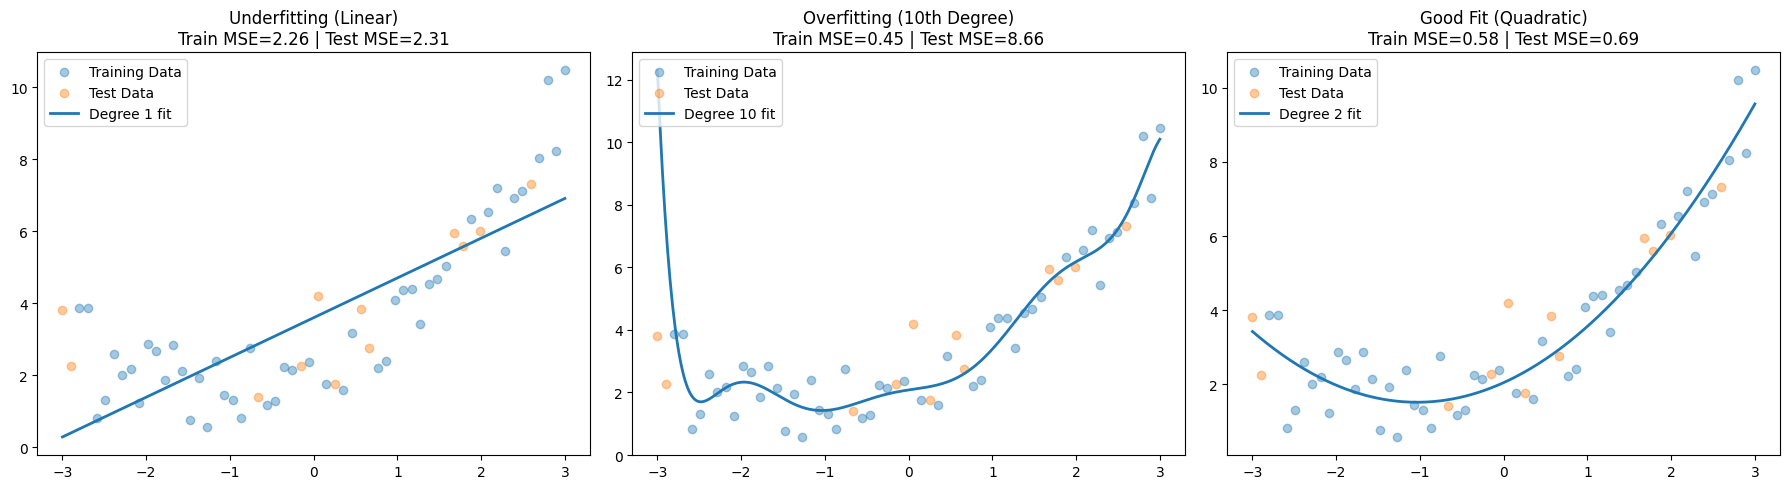

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# --- Synthetic dataset (true function is quadratic) ---
rng = np.random.default_rng(42)
X = np.linspace(-3, 3, 60).reshape(-1, 1)
eps = rng.normal(0, 1.0, size=X.shape)
y = 0.5 * X**2 + X + 2 + eps

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

def fit_poly(Xtr, ytr, degree):
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    Xtr_poly = poly.fit_transform(Xtr)
    model = LinearRegression().fit(Xtr_poly, ytr)
    return model, poly

def eval_model(model, poly, Xtr, ytr, Xte, yte):
    ytr_hat = model.predict(poly.transform(Xtr))
    yte_hat = model.predict(poly.transform(Xte))
    return mean_squared_error(ytr, ytr_hat), mean_squared_error(yte, yte_hat)

# Degrees to visualize
degrees = [1, 10, 2]
titles = ["Underfitting (Linear)", "Overfitting (10th Degree)", "Good Fit (Quadratic)"]

# Smooth grid for plotting predictions
X_plot = np.linspace(-3, 3, 400).reshape(-1, 1)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, d, title in zip(axes, degrees, titles):
    model, poly = fit_poly(X_train, y_train, d)
    y_plot = model.predict(poly.transform(X_plot))
    tr_mse, te_mse = eval_model(model, poly, X_train, y_train, X_test, y_test)
    
    ax.scatter(X_train, y_train, alpha=0.4, label="Training Data")
    ax.scatter(X_test, y_test, alpha=0.4, label="Test Data")
    ax.plot(X_plot, y_plot, linewidth=2, label=f"Degree {d} fit")
    ax.set_title(f"{title}\nTrain MSE={tr_mse:.2f} | Test MSE={te_mse:.2f}")
    ax.legend(loc="upper left")

plt.tight_layout()
plt.show()

### **Bias-Variance Trade-off**
A model that closely matches the training data is described as having low bias. While low bias may seem desirable, it is not always beneficial, as it can indicate overfitting. Overfitting will likely result in poor predictions and this situation is associated with high variance. On the other hand, an underfit model is described as having high bias and it will usually also experience high variance since it fails to properly capture the relaitonships in the underlying data. Bias and variance are often described as a trade-off: reducing bias (by making the model more complex) can increase variance, while reducing variance (by simplifying the model) can increase bias. Good modeling aims to strike a balance between the two, achieving a level of complexity that generalizes well to new data.

The illustration below shows examples of high vs. low bias and variance in the context of a dartboard:
- High Bias, Low Variance (Underfitting): Consistently far from the center (bias), but small grouping (variance)
- Low Bias, High Variance (Overfitting): Centered around the target (low bias), but widely spread out (high variance)
- High Bias, High Variance: Far from the center (high bias) and widely scattered (high variance)
- Low Bias, Low Variance (Ideal): Close to the center (low bias) with a tight grouping (low variance).

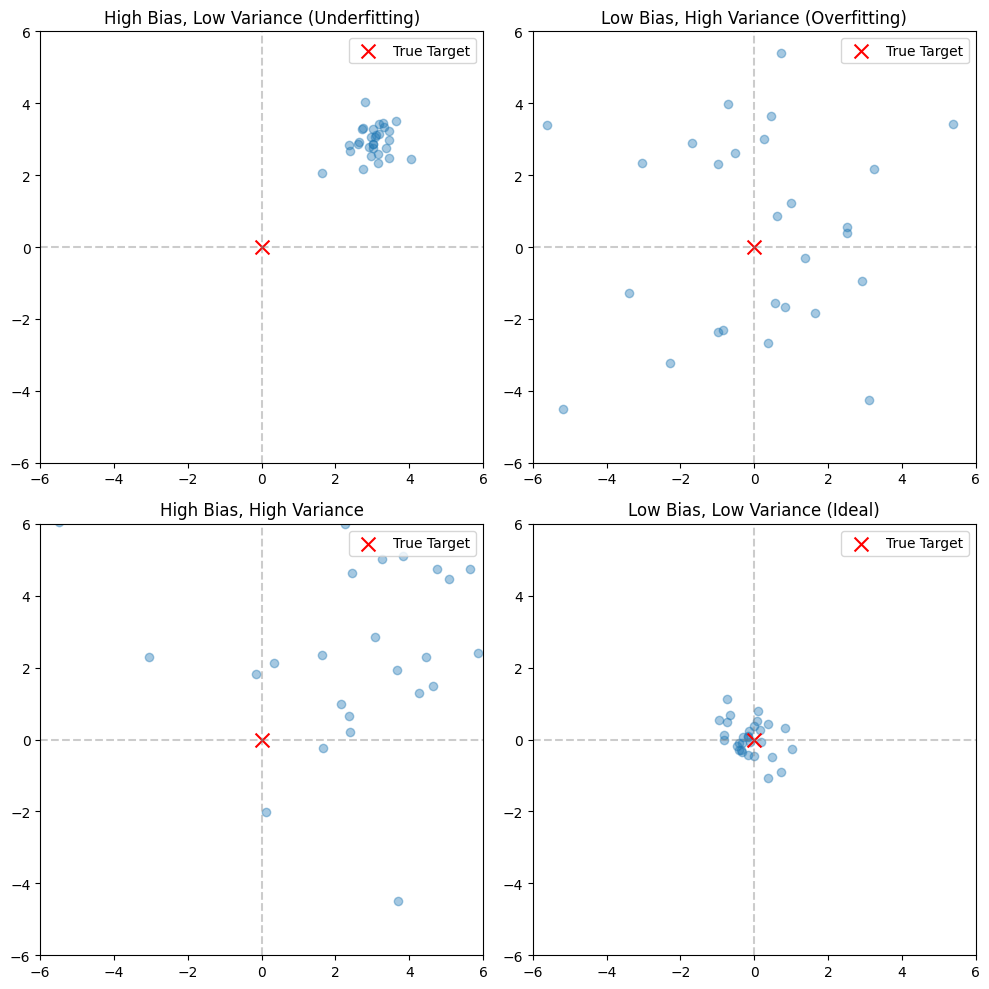

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Function to simulate "predictions" on a dartboard
def generate_points(center, spread, n=30, seed=None):
    rng = np.random.default_rng(seed)
    return center + rng.normal(0, spread, (n, 2))

# Setup the dartboard (true target = center)
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

examples = {
    "High Bias, Low Variance (Underfitting)": {"center": [3, 3], "spread": 0.5, "seed": 1},
    "Low Bias, High Variance (Overfitting)": {"center": [0, 0], "spread": 3, "seed": 2},
    "High Bias, High Variance": {"center": [3, 3], "spread": 3, "seed": 3},
    "Low Bias, Low Variance (Ideal)": {"center": [0, 0], "spread": 0.5, "seed": 4},
}

for ax, (title, params) in zip(axes.flatten(), examples.items()):
    points = generate_points(np.array(params["center"]), params["spread"], seed=params["seed"])
    ax.scatter(points[:, 0], points[:, 1], alpha=0.4)
    ax.scatter(0, 0, c="red", s=100, marker="x", label="True Target")  # true center
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.axhline(0, color="gray", linestyle="--", alpha=0.4)
    ax.axvline(0, color="gray", linestyle="--", alpha=0.4)
    ax.set_title(title)
    ax.legend()

plt.tight_layout()
plt.show()


### **Residuals**
When we fit a supervised machine learning model, we need a way of assessing whether the model is a good fit or not. When predicting a continuous target, we can intuitively say that the model performs well when the values it predicts are close to the true values. Note that the true values are called the **observed values** while the values we predict are called the **fitted values**. The difference between an observed and fitted value represents the extent to which the model was wrong in its prediction and is called the **residual**. 

$Residual_i = Observed\ Value_i - Fitted\ Value_i$

In the example below we plot a simple linear model and consider an observed value. The difference between the observed value and the predicted value (i.e. the line) is the residual and represents how 'wrong' the model was.

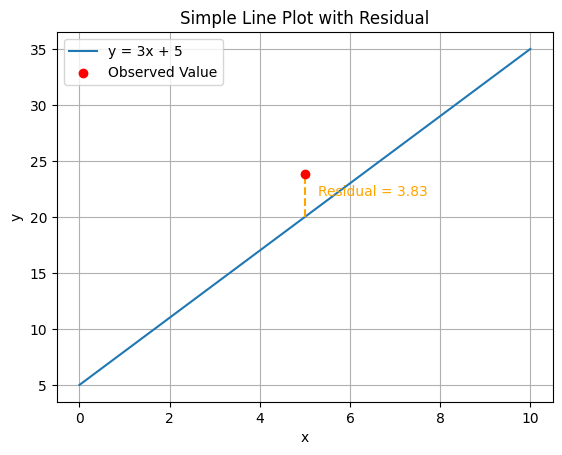

In [42]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=999)

# Line data
x = np.linspace(0, 10, 100)
y = 3 * x + 5

# Random point
x_points = [5]
coords = []
for x_point in x_points:
    y_rand = 3 * x_point + 5 + rng.normal(scale=5)  # Add noise for realism
    y_pred = 3 * x_point + 5
    residual = y_rand - y_pred
    coords.append((x_point, y_rand, y_pred, residual))

# Plot
plt.figure()
plt.plot(x, y, label='y = 3x + 5')
for x_point, y_rand, y_pred, residual in coords:
    plt.scatter(x_point, y_rand, color='red', zorder=5, label="Observed Value")
    plt.vlines(x_point, y_pred, y_rand, color='orange', linestyle='--')

    # Annotate
    plt.text(x_point + 0.3, (y_rand + y_pred) / 2,
            f"Residual = {residual:.2f}", color='orange')

plt.title("Simple Line Plot with Residual")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


## Loss Functions
When we fit a supervised machine learning model we are attempting to estimate the parameters of the model that fit the data best but also generalise well to unseen data. But how should we choose which model should be considered best? **Loss functions** represent a way of quantifying the quality of a model fit and minimising the cost function is typically the mechanism by which we choose which parameters to use. Sometimes we can minimise the loss function analytically meaning we can create a mathematical representation of the value which represents the minimum. This is done by creating a representation of the derivative of the cost function and solving for when this derivative is 0. However, often cost functions are highly complex and cannot be solved analytically so must be estimated computationally. Gradient decent (discussed separately) is an algorithm for estimating the value which minimises a function. It can be implemented to estimate the parameters of a model which minimise the cost function and therefore fit the data best. 

For instance, when fitting a straight line to data in two dimensions, we can use the sum of squared residuals as the loss function. We square the residual to make it positive; doing so ensures we only capture the total error and negative errors don't cancel out positive errors. Note, we square the residuals rather than take the absolute value since squaring them keeps the loss function continuously differentiable, thus enabling us to find the minima analytically by solving for when the derivative is 0. 

Please refer to `linear_regression.md` further discussion of fitting a straight line and a more formalised definition the sum of squared residuals. 

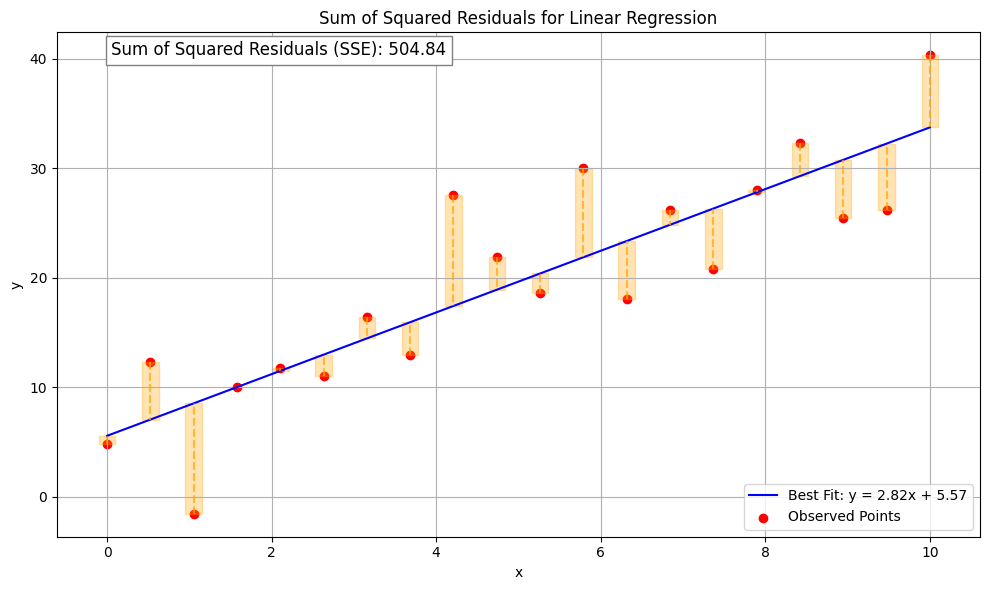

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Create reproducible data
x = np.linspace(0, 10, 20)
y_true = 3 * x + 5
noise = np.random.normal(scale=5, size=x.shape)
y_obs = y_true + noise

# Fit a linear model (least squares)
coeffs = np.polyfit(x, y_obs, 1)
y_fit = np.polyval(coeffs, x)

# Compute residuals
residuals = y_obs - y_fit
squared_residuals = residuals**2
sse = np.sum(squared_residuals)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_fit, label=f'Best Fit: y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}', color='blue')
plt.scatter(x, y_obs, color='red', label='Observed Points')

# Draw residuals and squares
for xi, yi_obs, yi_fit in zip(x, y_obs, y_fit):
    plt.vlines(xi, yi_obs, yi_fit, color='orange', linestyle='--', alpha=0.7)
    plt.fill_betweenx([yi_obs, yi_fit], xi - 0.1, xi + 0.1, color='orange', alpha=0.3)

# Add SSE annotation
plt.text(0.05, max(y_obs), f"Sum of Squared Residuals (SSE): {sse:.2f}",
         fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='gray'))

plt.title("Sum of Squared Residuals for Linear Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### **$R^2$**
The metric $R^2$ is used to answer the question *"What proportion of the variation in the data is explained by the model?"*. It works by comparing the total variation in the data (measured around the mean) with the residual variation (measured around the fitted values). As discussed in **01 – Probability & Statistics**, the variance is the average squared distance from the mean:
$$
\text{Var}(Y) = \frac{1}{n}\sum (y_i - \bar{y})^2
$$
Equivalently, the variance corresponds to the average squared residuals of a baseline model that always predicts the mean.

For a fitted model, the **Mean Squared Error (MSE)** is:
$$
\text{MSE} = \frac{1}{n}\sum (y_i - \hat{y}_i)^2
$$

$R^2$ is defined as:
$$
R^2 = \frac{\text{Var}(Y) - \text{MSE}}{\text{Var}(Y)} = 1 - \frac{\text{MSE}}{{\text{Var}(Y)}}
$$

To see why this definition answers the question, note that $\frac{\text{MSE}}{{\text{Var}(Y)}}$ represents the variation around the fitted values (i.e. the model) as a proportion of the variation around the mean. This expression is the proportion of the variation in the data which remains after accounting for the model and hence is exactly the proportion of the variation *not* explained by the model. Thus $R^2 = 1 - \frac{\text{MSE}}{{\text{Var}(Y)}}$ is precisely the proportion of the variation that *is* explained by the model.

To illustrate this more concretely, consider fitting a straight line to data in two dimensions. Suppose the data has perfect correlation and so lies exactly on a straight line. In this case the model explains 100% of the variance in the data. We also have ${\text{res}} = 0 $ for all residuals and so $\text{MSE}=0$ giving $R^2=1$. 

Conversely, consider the baseline model that always predicts the mean. In this case the model explains none of the variation beyond what is already captured by the mean (since it's just predicting the mean for each fitted value). Thus $\text{MSE}=\text{Var}(Y)$ and so $R^2=0$.

Often $R^2 \in [0,1]$ however it is possible to have a $R^2<0$ when the model is worse than predicting the mean. Suppose for example we fit a straight line with negative slope to data with perfect positive correlation. This model will be very badly alligned to the data and so we could obtain $\text{MSE}>>\text{Var}(Y)$ and therefore $R^2<0$.

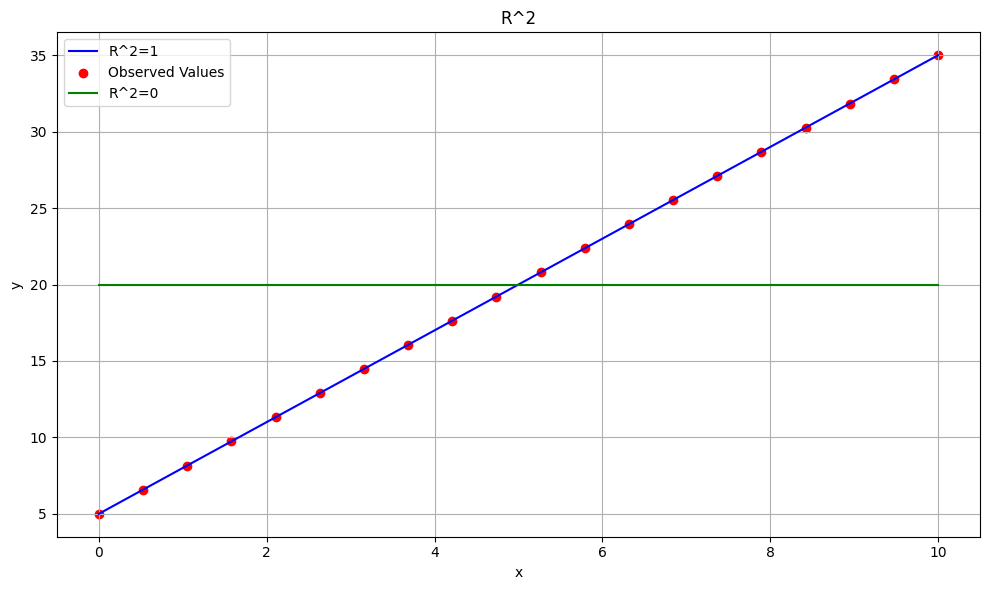

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create reproducible data
x = np.linspace(0, 10, 20)
y_obs = 3 * x + 5

# Fit a linear model (least squares)
coeffs = np.polyfit(x, y_obs, 1)
y_fit_lm = np.polyval(coeffs, x)

# Compute residuals for linear model
residuals_lm = y_obs - y_fit_lm
squared_residuals_lm = residuals_lm**2
mse_lm = np.average(squared_residuals_lm)
r_squared_lm = 1 - mse_lm / np.var(y_obs)

# Plot observed values and linear model
plt.figure(figsize=(10, 6))
plt.plot(x, y_fit_lm, color='blue', label=f"R^2={int(r_squared_lm)}")
plt.scatter(x, y_obs, color='red', label='Observed Values')

# Fit line though mean with slop 0
y_fit_m = np.repeat(np.average(y_obs), len(y_obs))

# Compute residuals for predicting mean
residuals_m = y_obs - np.average(y_obs)
squared_residuals_m = residuals_m**2
mse_m = np.average(squared_residuals_m)
r_squared_m = 1 - mse_m / np.var(y_obs)

# Plot straight line
plt.plot(x, y_fit_m, color='green', label=f"R^2={int(r_squared_m)}")


plt.title("R^2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
